In [1]:
import LibAu as la
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
nhalo=21 #Name Halo
nsnap= 63 #z=0
sim = la.Reader_Au(Nhalo=nhalo,Nsnap=nsnap) #Read Simulation

Load Header

In [3]:
header = sim.Header()
h=header['hubbleparam']
sc=header['time']

In [4]:
Rvir =sim.sf.data['frc2'][0]*1000*sc/h #load Rvir using R200. See acronyms in LibAu.py 
#reference of specifications of IllustrisTNG www.tng-project.org/data/docs/specifications/#sec2a

In [5]:
# Load Subhalo 0
fields_stars = ['pos','vel','id','mass','type','pot','age']
Datstars = sim.Snapshot_Subhalo(idSubhalo=0,snapType='stars',fields=fields_stars)

fields_dm = ['pos','vel','id','mass','type','pot']
DatDM = sim.Snapshot_Subhalo(idSubhalo=0,snapType='dm1',fields=fields_dm)


#Rotate Halo
Data = {'stars':Datstars,'dm1':DatDM}
param = {'spos':sim.sf.data['spos'][0,:],
        'svel':sim.sf.data['svel'][0,:],
        'header':sim.Header()}
gal = la.ToolRot(Data=Data, param=param)

Data = gal.Rotate()
Datstars=Data['stars']
DatDM = Data['dm1']

In [6]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
DatDM['pos'][0]

array([ 0.03002195,  0.08216938, -0.0153716 ], dtype=float32)

(19107866, 3) (18646088,) (18646088,)


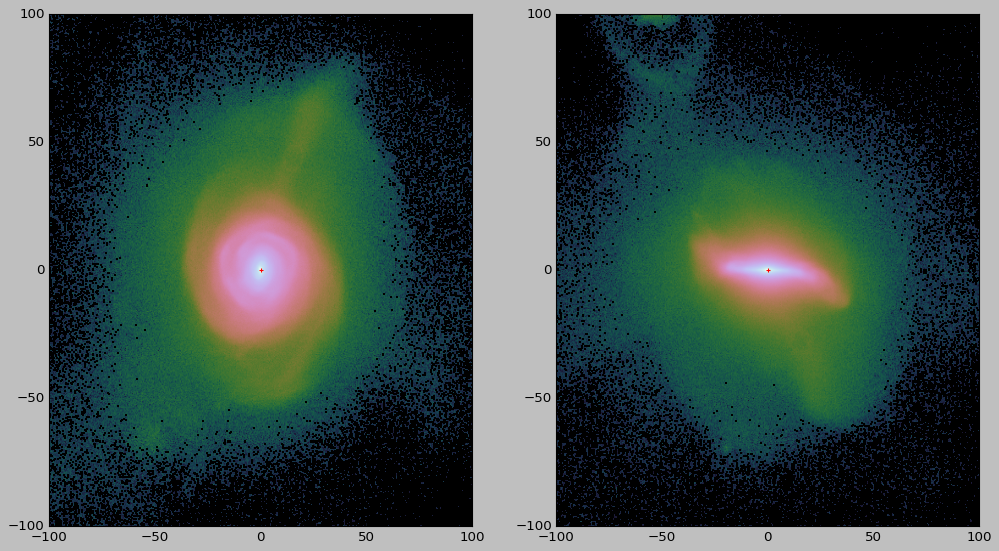

In [7]:
pos = Datstars['pos']
X = pos[:,0]
Y = pos[:,1]
Z = pos[:,2]
cut= (np.abs(X)<=100)& (np.abs(Y)<=100)& (np.abs(Z)<=100)

M = Datstars['mass']
X,Y,Z,M=X[cut],Y[cut],Z[cut],M[cut]
print(pos.shape,X.shape,M.shape)
H,_x,_y,box = la.StellarDensity2D(X,Y,M,npix = [500,500],style='SD')
H2,_x2,_y2,box = la.StellarDensity2D(X,Z,M,npix = [500,500],style='SD')
#plt.scatter(spos[:,0],spos[:,1])

plt.figure(figsize=(15,8))
ax=plt.subplot(1,2,1)
ax.patch.set_facecolor('black')
extent = _x.min(),_x.max(),_y.min(),_y.max()
plt.imshow(np.log10(H).T,cmap='cubehelix',extent=extent,aspect='auto',origin='lower')
plt.scatter(0,0,s=10,c='r',marker='+')

ax=plt.subplot(1,2,2)
ax.patch.set_facecolor('black')
extent = _x2.min(),_x2.max(),_y2.min(),_y2.max()
plt.imshow(np.log10(H2).T,cmap='cubehelix',extent=extent,aspect='auto',origin='lower')
plt.scatter(0,0,s=10,c='r',marker='+')

[60622.2 60622.2 60622.2 ... 60622.2 60622.2 60622.2]
(31503466, 3) (30957677,) (30957677,)


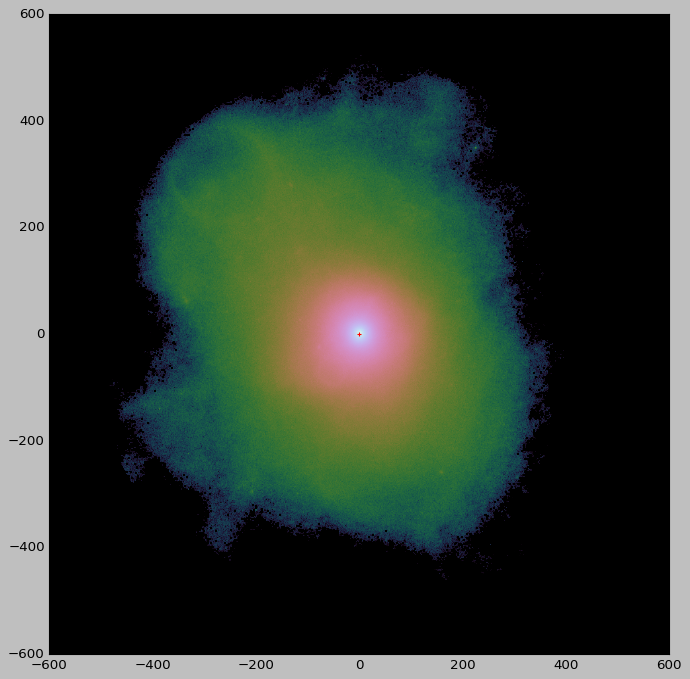

In [8]:
pos = DatDM['pos']
X = pos[:,0]
Y = pos[:,1]
Z = pos[:,2]
M = DatDM['mass']
print(M)
r3dm = np.sqrt(X**2 + Y**2 + Z**2)
cut= r3dm<=1.5*Rvir
X,Y,Z,M=X[cut],Y[cut],Z[cut],M[cut]
print(pos.shape,X.shape,M.shape)
H,_x,_y,box = la.StellarDensity2D(X,Y,M,npix = [700,700],style='SD')


plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1)
ax.patch.set_facecolor('black')
extent = _x.min(),_x.max(),_y.min(),_y.max()
plt.imshow(np.log10(H).T,cmap='cubehelix',extent=extent,aspect='auto',origin='lower')
plt.scatter(0,0,s=20,c='r',marker='+')

Text(0.5, 0, 'r kpc')

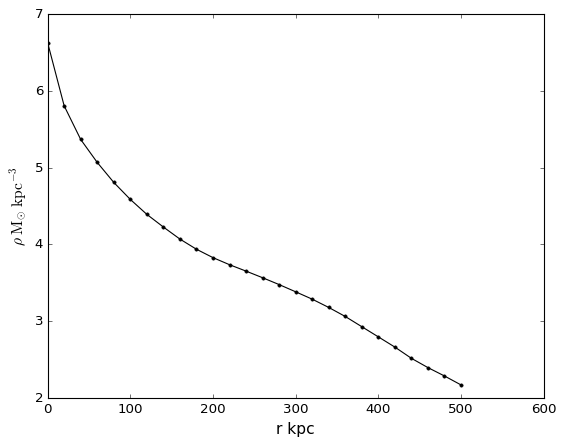

In [9]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_facecolor('white')
DR = np.arange(r3dm[cut].min(),r3dm[cut].max(),20)
rho = []
for i,j in enumerate(DR):
    if i==len(DR)-1:continue
    sel = (j<=r3dm[cut])&(r3dm[cut]<DR[i+1])
    vol = (4/3)*np.pi*(DR[i+1]**3 - j**3)
    rho.append(np.sum(M[sel])/vol)

plt.plot(DR[:-1],np.log10(rho),lw=1,marker='.',c='k')
plt.ylabel(r'$\rm \rho\; M_{\odot}\;kpc^{-3}}$',fontsize=14)
plt.xlabel(r'r kpc',fontsize=14)

In [10]:
M.max()*1e10/h,M.min()*1e10/h,Rvir

(894528540928877.1, 894528540928877.1, 349.25210558595916)

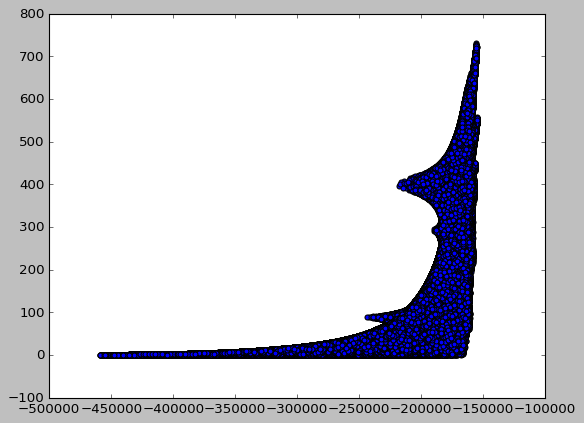

In [11]:
potdm = DatDM['pot']
r = np.sqrt( DatDM['pos'][:,0]**2 + DatDM['pos'][:,1]**2 )

plt.scatter(potdm,r)

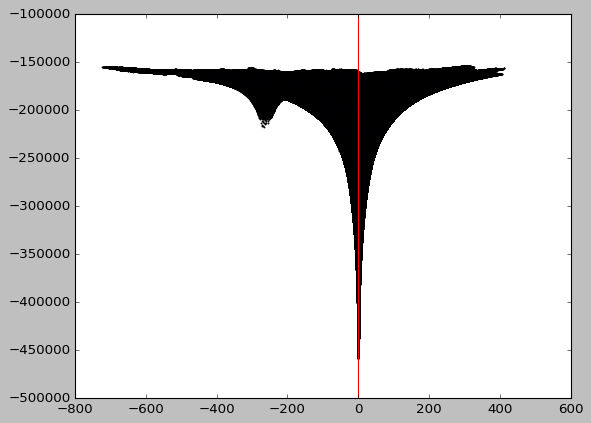

In [12]:
plt.scatter(DatDM['pos'][:,0],potdm,s=0.5)
plt.axvline(0,c='r')

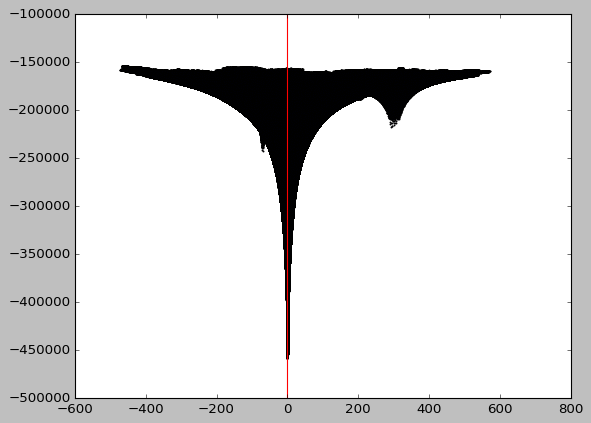

In [13]:
plt.scatter(DatDM['pos'][:,1],potdm,s=0.5)
plt.axvline(0,c='r')

In [14]:
lists = "/data/repository/level3_MHD/lists/halo_21starID_accreted_all_newmtree.dat"

In [15]:
listtext = open(lists,'rb')

FileNotFoundError: [Errno 2] No such file or directory: '/data/repository/level3_MHD/lists/halo_21starID_accreted_all_newmtree.dat'

In [ ]:
f = open(lists,'r')
ndiskt = np.fromfile(f,'int32',1)

In [ ]:
Data = []
for ii in range(20):
    row = np.fromfile(f,'double',ndiskt[0])
    Data.append(np.array(row))

In [ ]:
for i in Data:
    print(len(i))

In [ ]:
Data

In [ ]:

np.fromfile(lists,dtype=np.int8)